<a href="https://colab.research.google.com/github/iammaaj10/ADV_JS/blob/main/GoldPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [3]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
gold_data.shape

(2290, 6)

In [7]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [9]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [15]:
gold_data['Date'] = pd.to_datetime(gold_data['Date'], errors='coerce')



In [16]:
gold_data_clean = gold_data.drop(columns=['Date'])

In [17]:
correlation = gold_data_clean.corr()


<Axes: >

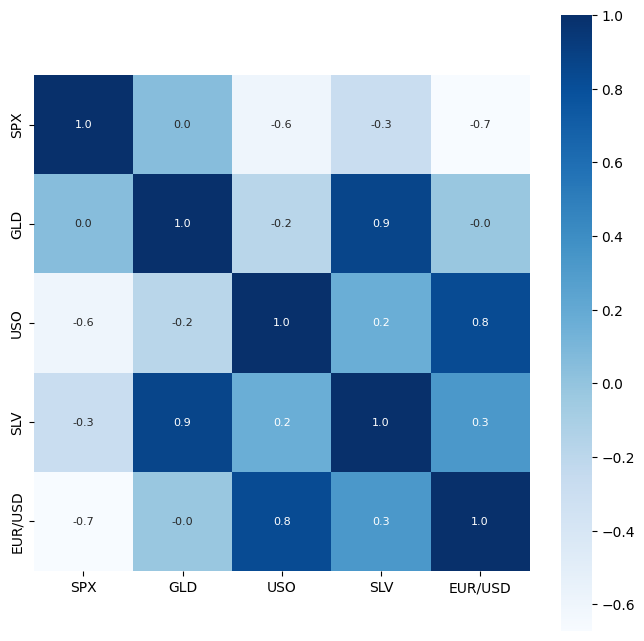

In [21]:
plt.figure(figsize =(8,8))
sns.heatmap(correlation,cbar=True , square = True , fmt ='.1f',annot =True ,annot_kws={'size':8},cmap='Blues')

In [22]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-24-4569879e3289>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

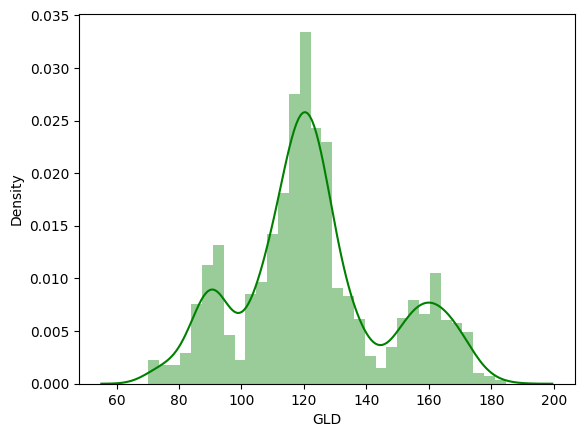

In [24]:
sns.distplot(gold_data['GLD'],color='green')

In [25]:
X=gold_data.drop(['Date','GLD'],axis=1)
Y=gold_data['GLD']

In [26]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [27]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [28]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=2)

In [29]:
regressor=RandomForestRegressor(n_estimators=100)

In [30]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [31]:
test_data_prediction=regressor.predict(X_test)

In [32]:
print(test_data_prediction)

[168.74649949  81.9038     115.8750004  127.53140078 120.7983009
 154.74769741 150.24249907 126.00040027 117.39439882 125.92820106
 116.80310089 171.63690078 141.28439884 167.80209781 115.14239995
 117.85690041 139.14110261 170.47830099 159.30540281 159.0290995
 155.03060006 124.9686     175.74340007 156.99080339 125.24150066
  93.95849957  78.05940008 120.92090028 119.02949923 167.35549904
  88.23820029 125.11370018  91.04310071 117.6949003  121.13969947
 135.88830036 115.4500013  115.44170104 147.31359889 107.3418008
 104.11280254  87.01259788 126.50190069 117.79950003 152.70899921
 119.56369999 108.36469992 108.06419838  93.13480032 127.06209793
  74.96500016 113.63609915 121.04419985 111.27299918 118.83699884
 120.72219932 159.42049875 169.20640076 146.92379668  85.85119875
  94.09160024  86.82029898  90.38009978 118.90330086 126.46720056
 127.64000006 169.3599003  122.13729926 117.3556993   98.58660062
 167.73490059 143.02309792 132.14700263 121.16750217 121.44759948
 119.91210035

In [33]:
error_score= metrics.r2_score(Y_test,test_data_prediction)
print("R Squared error",error_score)

R Squared error 0.9890292197890729


In [34]:
Y_test = list(Y_test)

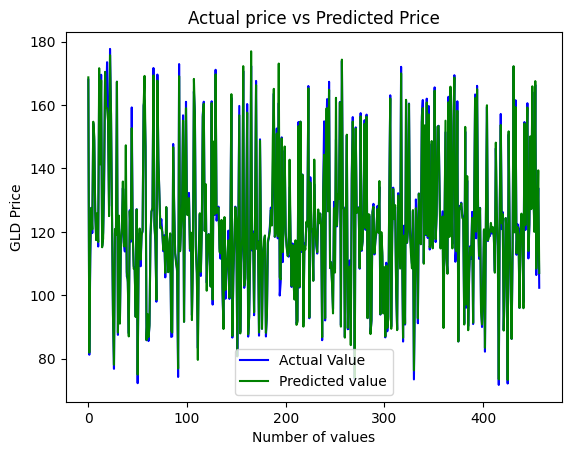

In [35]:
plt.plot(Y_test , color='blue' , label='Actual Value')
plt.plot(test_data_prediction,color='green',label='Predicted value')
plt.title('Actual price vs Predicted Price')
plt.xlabel("Number of values")
plt.ylabel('GLD Price')
plt.legend()
plt.show()